In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf

/Users/skk/opt/anaconda3/envs/skk/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/skk/opt/anaconda3/envs/skk/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/skk/opt/anaconda3/envs/skk/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/skk/opt/anaconda3/envs/skk/lib/python3.6/s

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
X = np.array(train.drop("label", axis=1)).astype('float32')
y = np.array(train['label']).astype('float32')

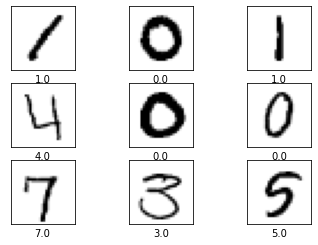

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [5]:
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = np.array(test).astype('float32')
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [6]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
________________________________________________

In [ ]:
#increse to epochs to 30 for better accuracy
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, batch_size=85, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 228s 7ms/step - loss: 0.2732 - accuracy: 0.9121 - val_loss: 0.0672 - val_accuracy: 0.9790
Epoch 2/30
33600/33600 [==============================] - 227s 7ms/step - loss: 0.0802 - accuracy: 0.9761 - val_loss: 0.0464 - val_accuracy: 0.9855
Epoch 3/30
33600/33600 [==============================] - 223s 7ms/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0433 - val_accuracy: 0.9862
Epoch 4/30
33600/33600 [==============================] - 225s 7ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0345 - val_accuracy: 0.9895
Epoch 5/30
33600/33600 [==============================] - 224s 7ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0286 - val_accuracy: 0.9910
Epoch 6/30
33600/33600 [==============================] - 1552s 46ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 7/30
33